# 1.0 Examine the data

### Load Required packages

In [3]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import os
import gc
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
#(!pip install iterative-stratification)

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
rcParams['figure.figsize'] = (8, 4)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [6]:
!ls ../

LICENSE  README.md  img  input	notebook


In [7]:
# YOUR PATH
path = f'/mnt/c/Users/bokhy/Desktop/Python/github/kaggle/bengaliai-cv19/input/'

### Set the filename for each file and read those out

In [5]:
## === For Pure Linux === ##
#data_dir = '../input/'
#files_train = [f'train_image_data_{imid}.parquet' for imid in range(4)]

#filename = os.path.join(data_dir, files_train[0])
#filename

#train0 = pq.read_table(filename)

In [6]:
## Windows WSL set path
# --help https://stackoverflow.com/questions/61046094/how-to-read-python-file-using-wsl
files_train = [f'/mnt/c/Users/bokhy/Desktop/Python/github/kaggle/bengaliai-cv19/input/train_image_data_{imid}.parquet' for imid in range(4)]

In [7]:
# Just looking at one parquet file now
filename = files_train[0]

In [9]:
# Always use [engine = 'fastparquet'] to avoid OOM
train0 = pd.read_parquet(filename, engine = 'fastparquet')

In [10]:
train0.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,32282,32283,32284,32285,32286,32287,32288,32289,32290,32291,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,253,254,253,253,253,254,253,252,253,253,253,253,252,252,253,253,252,252,253,252,252,252,253,254,253,253,252,252,252,253,252,251,252,252,251,252,251,251,251,251,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,252,250,250,246,249,248,250,249,251,252,253,253,253,253,253,253,253,250,249,251,252,251,251,251,251,252,253,251,250,252,251,250,250,249,249,250,251,251,250,250,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,252,253,252,252,251,250,251,253,254,251,251,252,252,253,253,252,251,251,249,251,252,252,253,252,251,251,251,250,250,252,253,252,250,251,252,252,253,254,253,253,...,251,252,252,253,253,253,252,252,253,253,253,253,252,252,252,253,253,253,253,253,252,251,251,250,250,250,251,251,251,250,250,250,251,252,253,253,253,253,254,254,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,250,251,250,249,251,251,251,250,252,251,245,245,251,252,251,252,252,250,249,250,251,250,249,250,251,252,253,252,252,252,252,252,252,251,251,249,246,246,249,252,...,254,254,254,254,254,254,253,253,254,254,253,252,252,254,253,253,254,253,252,253,254,253,252,253,254,254,254,254,254,254,254,254,253,252,253,254,253,252,253,254,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,225,231,229,229,228,221,224,226,221,221,220,217,217,218,219,222,224,214,218,227,227,227,228,224,231,235,235,233,212,183,196,230,218,230,244,236,222,240,235,219,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


In [11]:
# Each image has 137 as height and 236 as width (137*236 = 32333)
print(train0.shape)

(50210, 32333)


In [15]:
# Lets take a look at the very first image (idx = 0)
idx = 0

# We then need to 'unflatten' the image (get everything except the first column)
# images always has pixels between 0 and 255, so unit8 to reduce memory allocation
img = train0.iloc[idx, 1:].values.astype(np.uint8)

# reshape the image
img.reshape(137,236)

array([[254, 253, 252, ..., 254, 253, 251],
       [255, 253, 253, ..., 254, 253, 252],
       [255, 255, 255, ..., 254, 254, 253],
       ...,
       [254, 254, 253, ..., 253, 254, 252],
       [254, 254, 254, ..., 253, 253, 252],
       [254, 254, 254, ..., 253, 253, 251]], dtype=uint8)

In [16]:
# Look at the shape of the image
img.reshape(137,236).shape

(137, 236)

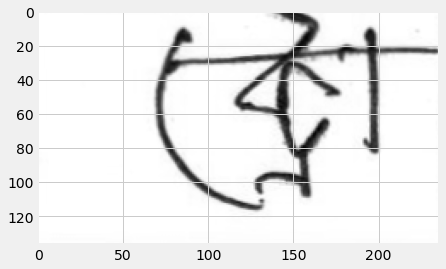

In [21]:
plt.imshow(img.reshape(137,236), cmap = 'gray')

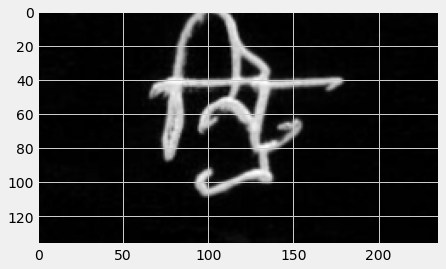

In [36]:
# It's critical to manually examine many of the images especially in CV problems
# Lets take a look at several more
idx = np.random.randint(len(train0))

img = train0.iloc[idx, 1:].values.astype(np.uint8)

plt.imshow(255 - img.reshape(137,236), cmap = 'gray')

In [ ]:
# We see most of the images are centered well
# The overall quality of the images are not bad

# 2.0 Multi-label Stratified Sampling (data folding)

In [38]:
path = f'/mnt/c/Users/bokhy/Desktop/Python/github/kaggle/bengaliai-cv19/input/'

In [40]:
df_train = pd.read_csv(os.path.join(path, 'train.csv'))

In [41]:
df_train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [54]:
df_train.shape

(200840, 5)

<AxesSubplot:>

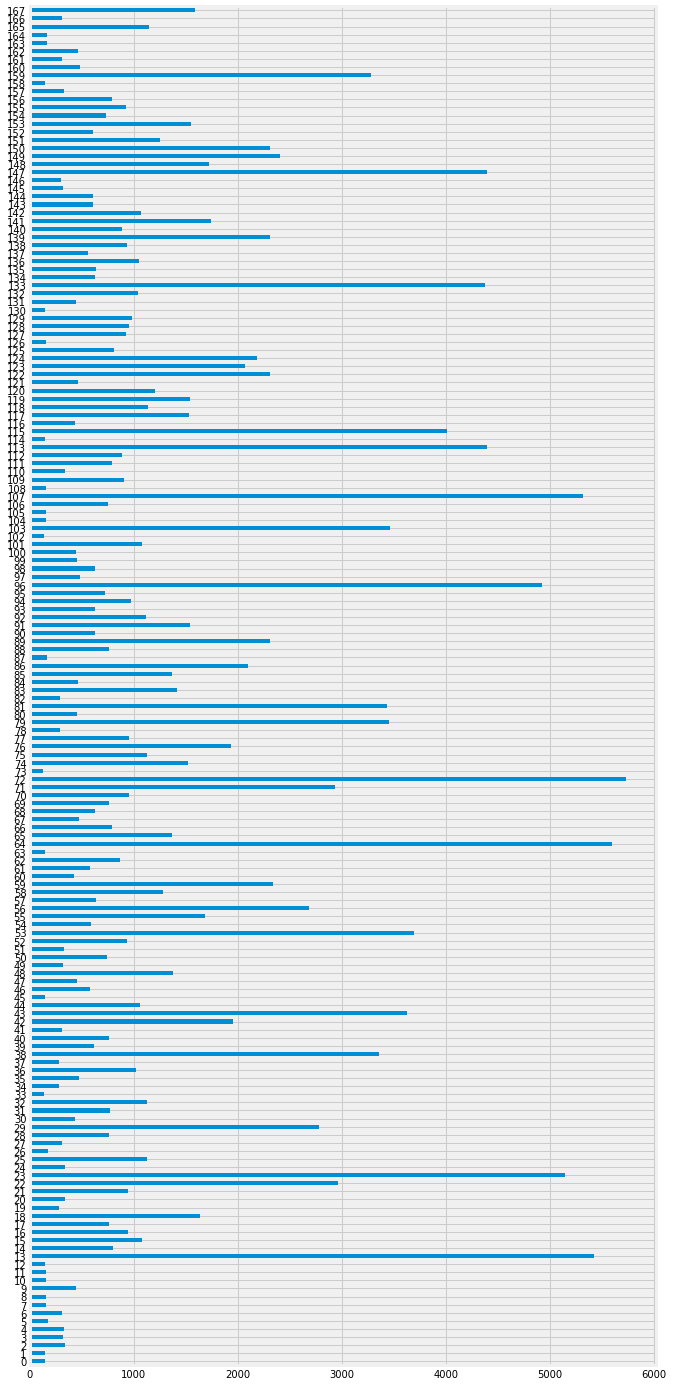

In [63]:
# Let's look at the distribution of the target labels
plt.figure(figsize = (10,25))
df_train['grapheme_root'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

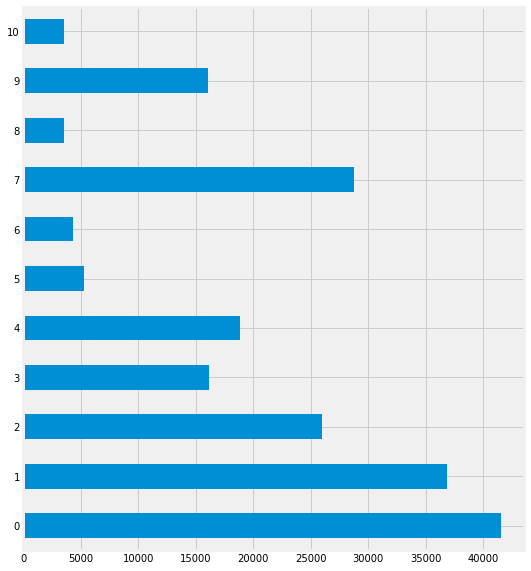

In [67]:
# Let's look at the distribution of the target labels
plt.figure(figsize = (8,10))
df_train['vowel_diacritic'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

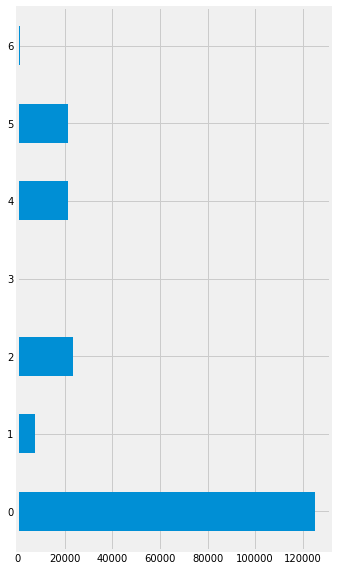

In [68]:
# Let's look at the distribution of the target labels
plt.figure(figsize = (5,10))
df_train['consonant_diacritic'].value_counts().sort_index().plot.barh()

In [ ]:
# Use Iterative-stratification (https://github.com/trent-b/iterative-stratification)
# It allows stratification folding of multiple classes of multiple variables 
# Presently scikit-learn provides several cross validators with stratification. However, these cross validators do not offer the ability to stratify multilabel data.

In [70]:
# Create IDs in train set 
# We can easily extract numbers from the 'image_id' column
df_train['id'] = df_train['image_id'].apply(lambda x: int(x.split('_')[1]))

In [71]:
df_train['id']

0              0
1              1
2              2
3              3
4              4
           ...  
200835    200835
200836    200836
200837    200837
200838    200838
200839    200839
Name: id, Length: 200840, dtype: int64

In [72]:
df_train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,id
0,Train_0,15,9,5,ক্ট্রো,0
1,Train_1,159,0,0,হ,1
2,Train_2,22,3,5,খ্রী,2
3,Train_3,53,2,2,র্টি,3
4,Train_4,71,9,5,থ্রো,4


In [77]:
# Get values of first column (just 'id')
X = df_train[['id', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values[:, 0]

In [78]:
# get values from second column ('grapheme_root', 'vowel_diacritic', 'consonant_diacritic')
y = df_train[['id', 'grapheme_root', 'vowel_diacritic', 'consonant_diacritic']].values[:, 1:]

In [81]:
mskf = MultilabelStratifiedKFold(n_splits=6, shuffle=True, random_state=623)

In [83]:
df_train['fold'] = 'int' #placeholder

for i, (trn_idx, vld_idx) in enumerate(mskf.split(X, y)):
    print("TRAIN:", trn_idx, "TEST:", vld_idx)
    df_train.loc[vld_idx, 'fold'] = i

TRAIN: [     0      1      2 ... 200837 200838 200839] TEST: [     4     12     15 ... 200791 200831 200833]
TRAIN: [     1      3      4 ... 200837 200838 200839] TEST: [     0      2      6 ... 200809 200813 200814]
TRAIN: [     0      1      2 ... 200837 200838 200839] TEST: [     3      8      9 ... 200830 200834 200835]
TRAIN: [     0      1      2 ... 200837 200838 200839] TEST: [    14     19     27 ... 200822 200827 200836]
TRAIN: [     0      2      3 ... 200836 200837 200838] TEST: [     1      5      7 ... 200823 200832 200839]
TRAIN: [     0      1      2 ... 200835 200836 200839] TEST: [    10     17     31 ... 200828 200837 200838]


In [84]:
df_train

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,id,fold
0,Train_0,15,9,5,ক্ট্রো,0,1
1,Train_1,159,0,0,হ,1,4
2,Train_2,22,3,5,খ্রী,2,1
3,Train_3,53,2,2,র্টি,3,2
4,Train_4,71,9,5,থ্রো,4,0
...,...,...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে,200835,2
200836,Train_200836,65,9,0,ত্তো,200836,3
200837,Train_200837,2,1,4,অ্যা,200837,5
200838,Train_200838,152,9,0,স্নো,200838,5


In [85]:
# Let's check if the fold is well splited
df_train['fold'].value_counts()

5    33474
0    33474
4    33473
3    33473
2    33473
1    33473
Name: fold, dtype: int64

In [ ]:
# Save the file with later use

In [89]:
df_train.to_csv(os.path.join(path, 'df_folds.csv'), index = False)